In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
import os
path = os.getcwd()
df = pd.read_csv('./US/nmurx_us_19Q1.csv')
df = df.select_dtypes(exclude=["object"])
df= df.fillna(0)
df.shape

(29873, 519)

In [34]:
def find_features(target_feature, df):
    df_func = df
    Y = df_func[target_feature].values
    del df_func[target_feature]
    X = df_func.values
    forest = ExtraTreesClassifier(n_estimators=250)
    forest.fit(X,Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(10):
        print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {df.columns[indices[f]]}")

    

In [37]:
def categorize_dast(val):
    if val > 4:
        return 1
    else:
        return 0

In [38]:
prescription_drugs_nmu = [col for col in df.columns if "NMUYR" in col]

In [67]:
illicit_drugs_use = ['COKE_USE','CRACK_USE','MDMA_USE','GHB_USE','ALKY_USE','KRAT_USE','SPEED_USE','METHAM_USE','NPFENT_USE','HEROIN_USE','KET_USE','MEPH_USE','LSD_USE','MUSH_USE','PCP_USE','MESC_USE','SPICE_USE','SAL_USE','DAST_CAT']

In [72]:
illicit_drugs_rec = [drug.replace('USE','REC') for drug in illicit_drugs_use]

In [79]:
illicit_drug_rec_list = df[illicit_drugs_rec]
illicit_drug_rec_list["DAST_ADD"] = illicit_drug_rec_list["DAST_CAT"].apply(categorize_dast)
del illicit_drug_rec_list['DAST_CAT']

<ipython-input-79-db8c86e999aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_drug_rec_list["DAST_ADD"] = illicit_drug_rec_list["DAST_CAT"].apply(categorize_dast)


In [40]:
total_drug_use = prescription_drugs_nmu + illicit_drugs_use
total_drug_use.append("DAST_CAT")

In [41]:
df['COKE_USE'].value_counts(normalize=True)[1]

0.10109463395038998

In [61]:
for drug in illicit_drugs_use:
    print(f"{drug}: {round(df[drug].value_counts(normalize=True)[1]*100,2)} %")

COKE_USE: 10.11 %
CRACK_USE: 3.44 %
MDMA_USE: 4.31 %
GHB_USE: 1.11 %
ALKY_USE: 3.4 %
KRAT_USE: 1.4 %
SPEED_USE: 4.69 %
METHAM_USE: 4.92 %
NPFENT_USE: 0.78 %
HEROIN_USE: 2.09 %
KET_USE: 1.62 %
MEPH_USE: 0.41 %
LSD_USE: 8.14 %
MUSH_USE: 7.6 %
PCP_USE: 1.94 %
MESC_USE: 3.39 %
SPICE_USE: 1.86 %
SAL_USE: 1.92 %


In [43]:
for drug in prescription_drugs_nmu:
    print(f"{drug}: {round(df[drug].value_counts(normalize=True)[1]*100,2)} %")

BHYD_NMUYR: 0.21 %
BUP_NMUYR: 0.37 %
COD_NMUYR: 2.06 %
DIHY_NMUYR: 0.19 %
ELU_NMUYR: 0.14 %
FENT_NMUYR: 0.44 %
GAB_NMUYR: 0.87 %
HYD_NMUYR: 2.27 %
HYDM_NMUYR: 0.28 %
KTM_NMUYR: 0.34 %
METH_NMUYR: 0.39 %
MORPH_NMUYR: 0.86 %
OXY_NMUYR: 1.91 %
OXYM_NMUYR: 0.27 %
PREG_NMUYR: 0.21 %
SUF_NMUYR: 0.17 %
TAP_NMUYR: 0.16 %
TRAM_NMUYR: 1.29 %
ALP_NMUYR: 1.36 %
BAC_NMUYR: 0.32 %
CHL_NMUYR: 0.1 %
CLOB_NMUYR: 0.13 %
CLON_NMUYR: 0.84 %
CLOR_NMUYR: 0.16 %
DIA_NMUYR: 0.74 %
EST_NMUYR: 0.1 %
ESZ_NMUYR: 0.15 %
FLUR_NMUYR: 0.14 %
LORA_NMUYR: 0.85 %
MID_NMUYR: 0.17 %
OXA_NMUYR: 0.13 %
QUA_NMUYR: 0.11 %
TEM_NMUYR: 0.21 %
TRI_NMUYR: 0.12 %
ZAL_NMUYR: 0.12 %
ZOL_NMUYR: 0.48 %
AMPH_NMUYR: 1.47 %
ATOM_NMUYR: 0.26 %
MPHEN_NMUYR: 0.37 %
MOD_NMUYR: 0.25 %
CANN_NMUYR: 0.75 %
DRON_NMUYR: 0.28 %
NAB_NMUYR: 0.26 %
ACE_NMUYR: 6.64 %
ASP_NMUYR: 6.39 %
DEX_NMUYR: 2.02 %
DIPH_NMUYR: 3.39 %
IBU_NMUYR: 9.57 %
LOP_NMUYR: 1.01 %
NAP_NMUYR: 3.42 %
OTCOTH_NMUYR: 1.36 %
PAINREL_NMUYR: 6.66 %
SED_NMUYR: 3.68 %
STIM_NMUYR: 2.0 %
T

In [65]:
drug_list = df[total_drug_use]
drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)
del drug_list['DAST_CAT']

<ipython-input-65-b78891166d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)


In [70]:
drug_list = df[illicit_drugs_use]
drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)
del drug_list['DAST_CAT']

<ipython-input-70-43a8621cbae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)


In [156]:
drug_cat = ['PAINREL_NMU','SED_NMU','STIM_NMU','THC_NMU','OP_NMU','GABA_NMU','DAST_CAT']
drugs = df[drug_cat]
drugs['DAST_ADD'] = drugs['DAST_CAT'].apply(categorize_dast)
del drugs['DAST_CAT']

<ipython-input-156-db2b161c8077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['DAST_ADD'] = drugs['DAST_CAT'].apply(categorize_dast)


In [89]:
drug_cat_wk = ['PAINREL_NMUWK','SED_NMUWK','STIM_NMUWK','THC_NMUWK','OP_NMUWK','GABA_NMUWK','DAST_CAT']
drugswk = df[drug_cat]
drugswk['DAST_ADD'] = drugswk['DAST_CAT'].apply(categorize_dast)
del drugswk['DAST_CAT']

<ipython-input-89-4ac8675464f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugswk['DAST_ADD'] = drugswk['DAST_CAT'].apply(categorize_dast)


In [157]:
find_features('DAST_ADD',drugs)


Feature ranking:
1 feature 1 (0.28079605891531806) SED_NMU
2 feature 2 (0.2140452810122654) STIM_NMU
3 feature 5 (0.20210613359173377) GABA_NMU
4 feature 4 (0.1634181552295504) OP_NMU
5 feature 0 (0.10769742110559129) PAINREL_NMU
6 feature 3 (0.03193695014554108) THC_NMU


IndexError: index 6 is out of bounds for axis 0 with size 6

In [109]:
def conditions(df):
    if (df['GABA_NMU']==1 or df['STIM_NMU'] == 1 or df['SED_NMU']==1):
        return 1
    else:
        return 0
df['DRUG_NMU'] = df.apply(conditions, axis=1)

In [110]:
def conditions2(df):
    if (df['GABA_NMU']==1 or df['STIM_NMU'] == 1 or df['SED_NMU']==1 or df['PAINREL_USE'] == 0 or df['THC_USE'] == 1 or df['OP_USE'] == 1):
        return 1
    else:
        return 0
df['ANY_NMU'] = df.apply(conditions2, axis=1)

In [140]:
variables = ['SED_NMU','STIM_NMU','GABA_NMU','DRUG_NMU','ANY_NMU','DEM_INCOME','DEM_REGION','DEM_GENDER','DEM_AGE10','DEM_MARITAL','DEM_RACE_BLACK','DEM_RACE_WHITE']
df_use = df[variables]

In [154]:
train, test = train_test_split(df_use, test_size=0.2)
Y = train['DRUG_NMU'].values
del train['DRUG_NMU']
del train['SED_NMU']
del train['STIM_NMU']
del train['GABA_NMU']
del train['ANY_NMU']
X = train.values


log = ExtraTreesClassifier(n_estimators=250)
log.fit(X,Y)
log.score(X,Y)
importances = log.feature_importances_
std = np.std([tree.feature_importances_ for tree in log.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(7):
    print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {train.columns[indices[f]]}")

Feature ranking:
1 feature 3 (0.37284469080248356) DEM_AGE10
2 feature 0 (0.20066540816781697) DEM_INCOME
3 feature 4 (0.17105966166326064) DEM_MARITAL
4 feature 1 (0.15124253405179697) DEM_REGION
5 feature 2 (0.03517691793324719) DEM_GENDER
6 feature 6 (0.03463067921308829) DEM_RACE_WHITE
7 feature 5 (0.034380108168306514) DEM_RACE_BLACK


In [143]:
Ytest = test['DRUG_NMU'].values
del test['DRUG_NMU']
del test['SED_NMU']
del test['STIM_NMU']
del test['GABA_NMU']
del test['ANY_NMU']
Xtest = test.values

<ipython-input-38-60cbcf4a91a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DAST_ADD'] = test['DAST_CAT'].apply(categorize_dast)


In [144]:
log.score(Xtest,Ytest)

0.901255230125523

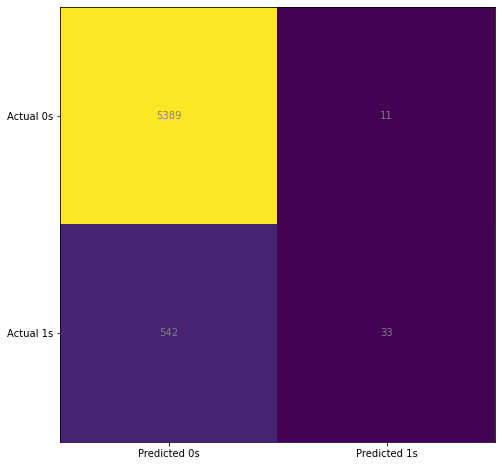

In [158]:
cm = confusion_matrix(Ytest, log.predict(Xtest))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey')
plt.show()